# Webtoon App Statistics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the Webtoon dataset using pandas

In [9]:
df = pd.read_csv('./Webtoon Dataset.csv').head(20)
df


,id,Name,Writer,Likes,Genre,Rating,Subscribers,Summary,Update,Reading Link
0,0,Let's Play,Leeanne M. Krecic (Mongie),30.6M,Romance,9.62,4.2M,"She's young, single and about to achieve her d...",UP EVERY TUESDAY,https://www.webtoons.com/en/romance/letsplay/l...
1,1,True Beauty,Yaongyi,39.9M,Romance,9.60,6.4M,"After binge-watching beauty videos online, a s...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/truebeauty...
2,2,Midnight Poppy Land,Lilydusk,10.4M,Romance,9.81,2.1M,After making a grisly discovery in the country...,UP EVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...
3,3,Age Matters,Enjelicious,25.9M,Romance,9.79,3.5M,She's a hopeless romantic who's turning 30's ...,UP EVERY WEDNESDAY,https://www.webtoons.com/en/romance/age-matter...
4,4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.9M,Supernatural,9.85,1.5M,When vampires destroy her chance to have the n...,UP EVERY THURSDAY,https://www.webtoons.com/en/supernatural/unhol...
5,5,LUMINE,Emma Krogell,18.9M,Fantasy,9.82,3M,"A runaway werewolf, Lumine, meets a witch boy ...",UP EVERY SUNDAY,https://www.webtoons.com/en/fantasy/lumine/lis...
6,6,Jackson's Diary,Paola Batalla,2.9M,Supernatural,9.66,649K,"The year is 1989, and Jackson is starting his ...",UP EVERY SUNDAY,https://www.webtoons.com/en/supernatural/jacks...
7,7,Teenage Mercenary,YC / Rakyeon,"9,29,796",Action,9.87,537.6K,"At the age of eight, Ijin Yu lost his parents ...",UP EVERY WEDNESDAY,https://www.webtoons.com/en/action/teenage-mer...
8,8,Nice To Meet You,Wishroomness,5.8M,Romance,9.82,1.1M,A ditsy university student Mew finds a lost st...,UP EVERY MONDAY,https://www.webtoons.com/en/romance/nice-to-me...
9,9,I Love Yoo,Quimchee,29M,Drama,9.78,4.3M,Dogged by pain and misfortune from the very be...,UP EVERY FRIDAY,https://www.webtoons.com/en/drama/i-love-yoo/l...


### the counts of each Webtoon with a certain genre 

<AxesSubplot:xlabel='Genre', ylabel='count'>

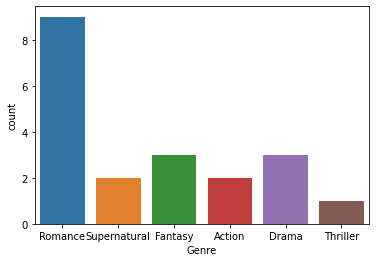

In [11]:
sns.countplot(x="Genre", data=df)

### Now, we want to plot the likes vs the subscribers and see how they are related

In [22]:
likes_subscribers=df[['Name','Likes','Subscribers']].head(10)
likes_subscribers

,Name,Likes,Subscribers
0,Let's Play,30.6M,4.2M
1,True Beauty,39.9M,6.4M
2,Midnight Poppy Land,10.4M,2.1M
3,Age Matters,25.9M,3.5M
4,Unholy Blood,9.9M,1.5M
5,LUMINE,18.9M,3M
6,Jackson's Diary,2.9M,649K
7,Teenage Mercenary,"9,29,796",537.6K
8,Nice To Meet You,5.8M,1.1M
9,I Love Yoo,29M,4.3M


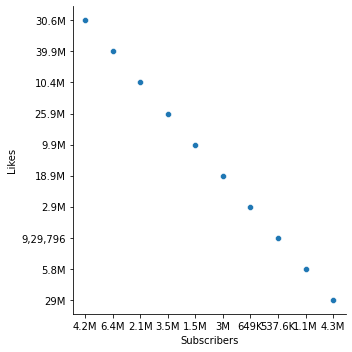

In [31]:
plot_legend = 'likes_subscribers'
plot=sns.relplot(x='Subscribers', y='Likes', data=likes_subscribers)
plot


 ### we notice that the likes and the subscribers have a linear relation, the more subscribers a series has, the more likes it gets . Now, if we want the average of the rating for each Genre:

In [56]:
mean_rating = df.groupby('Genre', as_index=False).mean()
mean_rating

,Genre,id,Rating
0,Action,12.000000,9.860000
1,Drama,10.666667,9.503333
2,Fantasy,10.666667,9.793333
3,Romance,8.222222,9.684444
4,Supernatural,5.000000,9.755000
5,Thriller,18.000000,9.830000


/home/user/course401/data-visulization/.venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Genre', ylabel='Rating'>

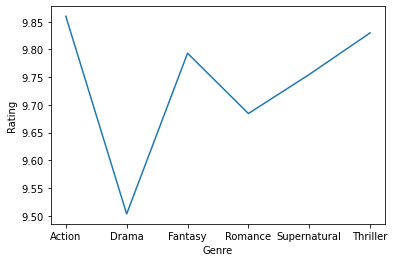

In [63]:
y = mean_rating["Rating"]
x=mean_rating["Genre"]



sns.lineplot(x,y)


### We notice that the action series has the highest rating, Drama has the lowest, which means that authors should pay attention to making more action series since Action genre was not frequent as the other genre as we saw in the count plot of all of the genre

### Now let's look as the daily updates vs the number of subscribers 

In [116]:
daily_subscribers = df[['Name','Subscribers','Update']].head(10)
daily_subscribers


,Name,Subscribers,Update
0,Let's Play,4.2M,UP EVERY TUESDAY
1,True Beauty,6.4M,UP EVERY WEDNESDAY
2,Midnight Poppy Land,2.1M,UP EVERY SATURDAY
3,Age Matters,3.5M,UP EVERY WEDNESDAY
4,Unholy Blood,1.5M,UP EVERY THURSDAY
5,LUMINE,3M,UP EVERY SUNDAY
6,Jackson's Diary,649K,UP EVERY SUNDAY
7,Teenage Mercenary,537.6K,UP EVERY WEDNESDAY
8,Nice To Meet You,1.1M,UP EVERY MONDAY
9,I Love Yoo,4.3M,UP EVERY FRIDAY


[4.2, 6.4, 2.1, 3.5, 1.5, 3.0, 649.0, 537.6, 1.1, 4.3]


<AxesSubplot:>

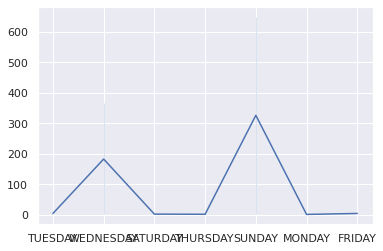

In [118]:
sns.set_theme(style="darkgrid")
arr = []
for i in range(len(daily_subscribers["Update"])):
    new_up=daily_subscribers["Update"][i].split()
    arr.append(new_up[2])
    
sub_arr=[]    
for i in range(len(daily_subscribers["Subscribers"])):
    new_sub=daily_subscribers["Subscribers"][i].replace(daily_subscribers["Subscribers"][i][len(daily_subscribers["Subscribers"][i])-1],"")
    sub_arr.append(float(new_sub))
print(sub_arr)       
daily_plot= sns.lineplot(x=arr, y = sub_arr, data = daily_subscribers) 
daily_plot

### from the graph above, we notice that people tend to subscribe the series that are updated on friday and tuesday, the peek of the graph of the sample data is on Sunday. Now let us take a look at the most popular authors:

In [114]:
popular_authors=df[['Name','Writer','Rating']].head(8)
popular_authors

,Name,Writer,Rating
0,Let's Play,Leeanne M. Krecic (Mongie),9.62
1,True Beauty,Yaongyi,9.60
2,Midnight Poppy Land,Lilydusk,9.81
3,Age Matters,Enjelicious,9.79
4,Unholy Blood,Lina Im / Jeonghyeon Kim,9.85
5,LUMINE,Emma Krogell,9.82
6,Jackson's Diary,Paola Batalla,9.66
7,Teenage Mercenary,YC / Rakyeon,9.87


<AxesSubplot:ylabel='Rating'>

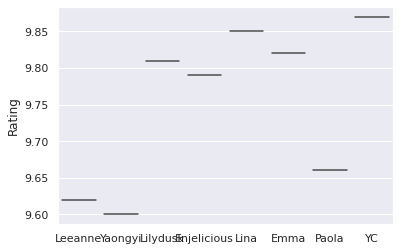

In [115]:
author_arr=[]
for i in range(len(popular_authors["Writer"])):
    new_au=popular_authors["Writer"][i].split()
    author_arr.append(new_au[0])

author_plot= sns.violinplot(x=author_arr, y = "Rating", data = popular_authors) 
author_plot

### So YC or Rakyeon tends to be the most popular author since her series has the highest rating among all of the others in the sample data

## Summary:
1. the more subscribers a series has, the more likes it gets, they have a linear relation.
2. people tend to read the series on Sunday, so the writers should be updating their series on this day to get more readers.
3. Romance is the most common genre
4. action genre has the highest rating
5. YC/Rakyeon is the most popular author
